
### 多层人工神经网络
你将学到
- 1. 更多深度学习的概念
- 2. 多层人工神经网络的实现

### ANN SVG
https://alexlenail.me/NN-SVG/

上节课中对数据的分类，单层模型的表现并不是很好

![image.jpg](https://img2.baidu.com/it/u=788256944,1044141135&fm=253&fmt=auto&app=138&f=JPEG?w=792&h=433)

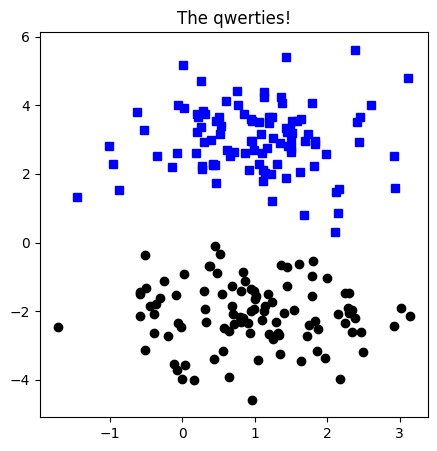

In [43]:

import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display

nPerClust = 100
blur =1

A = [1,3]
B = [1,-2]

a = [A[0] + np.random.randn(nPerClust)*blur , A[1] +  np.random.randn(nPerClust) *blur]
b = [B[0] + np.random.randn(nPerClust)*blur , B[1] +  np.random.randn(nPerClust) *blur]


labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

# 转化成 pytorch tensor 类型
data= torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# 展示

fig = plt.figure(figsize=(5,5))

v =np.where(labels==0)[0]

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.show()


### 创建模型和训练模型的函数

In [44]:

def createAnnModel(learningRate):

    ANNClassify =nn.Sequential(
       nn.Linear(2,16) ,
       nn.ReLU(),
       nn.BatchNorm1d(16),
       nn.Linear(16,1), # 隐藏层
       nn.ReLU(),
       nn.Linear(1,1),
       nn.Sigmoid()
    )

    lossfun = nn.BCELoss()
    # lossfun = nn.BCEWithLogitsLoss() 最好使用这个损失函数
    optimizer = torch.optim.SGD(ANNClassify.parameters(),lr=learningRate)

    return ANNClassify,lossfun,optimizer


In [45]:


numepochs = 1000


def trainTheModel(ANNModel,lossfun,optimizer):

    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):
        yHat = ANNModel(data)
       
        loss = lossfun(yHat,labels) 
        losses[epochi] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    predictions = ANNModel(data)


    ## 当最终的激活函数是 Sigmoid时， 这里要用 >.5 而不是 > 0
    totalacc = 100 * torch.mean(((predictions > .5) == labels).float())
    return losses ,predictions,totalacc


In [46]:
# plt.plot(predictions.detach(),'o')

In [47]:
## 把bool 转成float类型
# m= ((predictions > .5) == labels).float()

# mm = torch.mean(m)
# mm


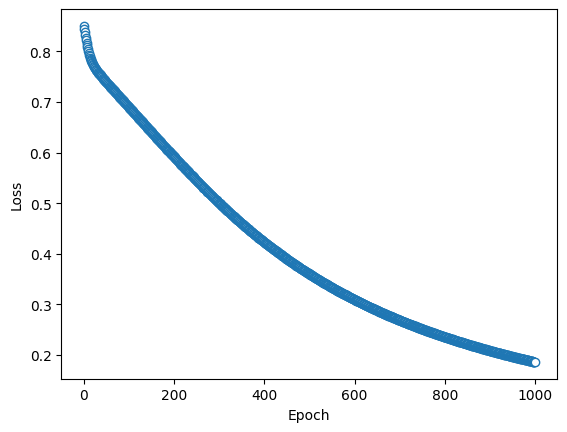

In [48]:



ANN, lf,opt = createAnnModel(.01)

losses,predictions,totalacc = trainTheModel(ANN,lf,opt)


plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth =.1)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


### 开始实际的训练

In [49]:


learningRates = np.linspace(.001,.1,50)
accByLR = []

allLosses = np.zeros((len(learningRates),numepochs))

# the loop
for i,lr in enumerate(learningRates):
    
    # create and run the model
    ANN,lf,opt = createAnnModel(lr)
    losses,predictions,totalacc = trainTheModel(ANN,lf,opt)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()



### 展示数据

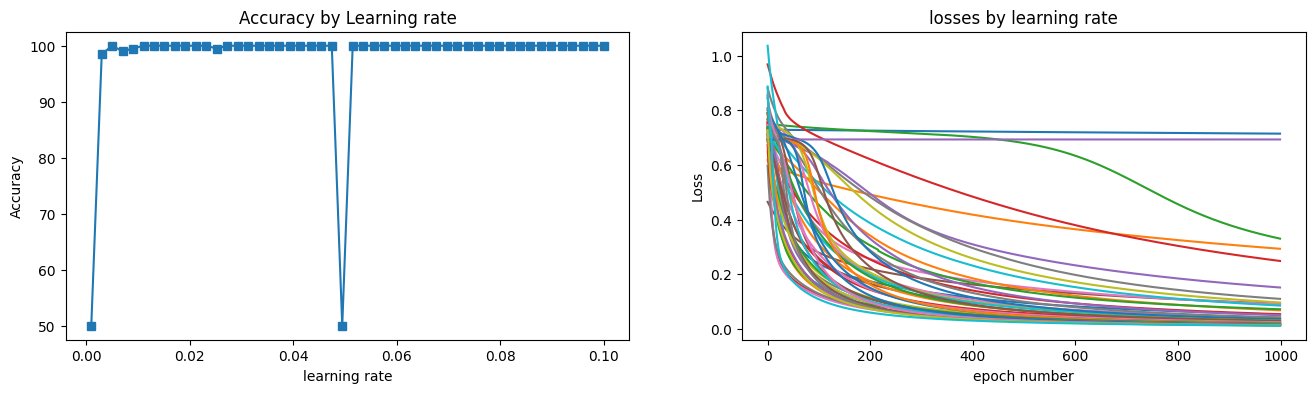

In [50]:

fix,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningRates,accByLR,'s-')
ax[0].set_xlabel('learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning rate')

ax[1].plot(allLosses.T)

ax[1].set_title('losses by learning rate')
ax[1].set_xlabel('epoch number')
ax[1].set_ylabel('Loss')

plt.show()



### 统计正确率

In [51]:

sum(torch.tensor(accByLR) > 70) / len(accByLR)

tensor(0.9600)